## Introduction

In our last lesson, we saw how to use the ipywidgets `interact` function to create a simple interace around a function allowing us to play around with the parameters of that function and instantly visualize its output. While it's awesome that we can create a full interace with just one line of code, it wasn't, as you might have guessed, the most refined interface. However, in this lesson, we'll take a look at the tools the ipywidgets library gives us to create a much more polished UI for our plotting functions.

So, let's dive right in, and get the setup out of the way.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import ipywidgets

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Review

If you'll remember from our last lesson, the use case we were working with was one in which we've received a large lump sum of money, and we want to pick out the right investment vehicle for our recent riches. To do that, we created two functions: the first calculates the future value of an investment, and the second plots the future value of an investment over several years. Both of these functions have been reproduced in the next cell, so let's go ahead and run it so we can continue from where we left off in our last lesson.

In [2]:
def fv(p, i, n, t):
    """Returns the future value of an investment
    
    Arguments:
    p -- Initial investment (i.e., present value)
    i -- Interest rate
    n -- Number of times investment is compounded per year
    t -- Total time (in years) of the investment
    """
    return p * (1 + float(i)/n)**(n * t)

def plot_fv(p, i, n, t):
    """Plots the value of an investment over time
    """
    # We add 1 to the range of years, so we include the initial
    # investment in our list as well.
    fvs = [fv(p, i, n, year) for year in range(t+1)]
    plt.plot(fvs)

### Sensible Limits

As I mentioned at the introduction, the problem we were left with at the end of our last lesson, is that the interface we created (with one line of code, mind you) was not the most polished. Specifically, we were left with two main issues. First, the limits of each parameter were poorly defined, e.g., we could choose negative values for each parameter, and in the case of the number of compounding periods, we could even end up with a division by zero error. Second, the granularity of some of the parameters was not quite what we wanted, specifically, we could only choose three different interest rates, and one of those was negative!

Fortunately, the `interact` function we used to create our interface allows us to fix these issues by passing in a tuple for each keyword argument where we can specify the minimum and maximum values of each slider, and optionally, a step value as well. 

In the next cell, we modify the previous call to `interact` to add some sensible limits, and refine the granularity of our interface a bit.

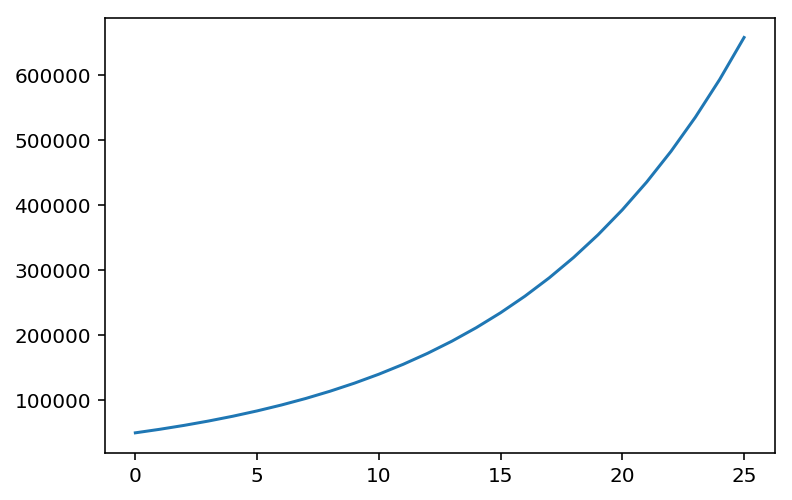

In [3]:
ipywidgets.interact(plot_fv, p=(0, 100000, 1000), i=(0.01, 0.2, 0.001), n=(1, 12), t=(1, 50));

### A Little Finer Control

Now, this is working much better than what we had at the end of our last lesson, but we still have a few more changes to make to really make our interface perfect. First, it would be great if the interface defaulted to the 10-year T-Bond info that we've been using all along. Second, those one character labels for each of the parameters, they probably aren't the easiest to understand, so it would be nice if they were a bit more verbose. Finally, we don't really need the plot to update as we're selecting a new value, it'd probably be a bit nicer if it only updated one time after we had chosen a new value for a parameter, so we'll need a way to stop the continuous updates as well.

To make all of these changes, we'll need to create our own widget objects instead of relying on the `interact` function to create them for us. Doing so is quite easy, just call the constructor for each widget and pass in the options you want as keyword arguments. 

In the next cell, we will set the min, max, step, and default values for each slider. We'll also give each one an easier to understand and more verbose label. Finally, we'll set the `continuous_update` parameter to `False` for each widget to make sure the plot only updates once we've selected a value. 

In [4]:
present_value = ipywidgets.IntSlider(min=0, max=100000, step=1000, value=10000, 
                                     description='Present Value', continuous_update=False)
interest_rate = ipywidgets.FloatSlider(min=0.01, max=0.2, step=0.001, value=0.047, 
                                       description='Interest Rate', continuous_update=False)
compounds_per_year = ipywidgets.IntSlider(min=1, max=12, value=1, 
                                          description='Compounds/Year', continuous_update=False)
years = ipywidgets.IntSlider(min=1, max=50, value=30, 
                             description='Years to Retirement', continuous_update=False)

Once we have each of the widgets created, we simply need to pass them into the `interact` function the same way that we did with the tuples in the previous example.

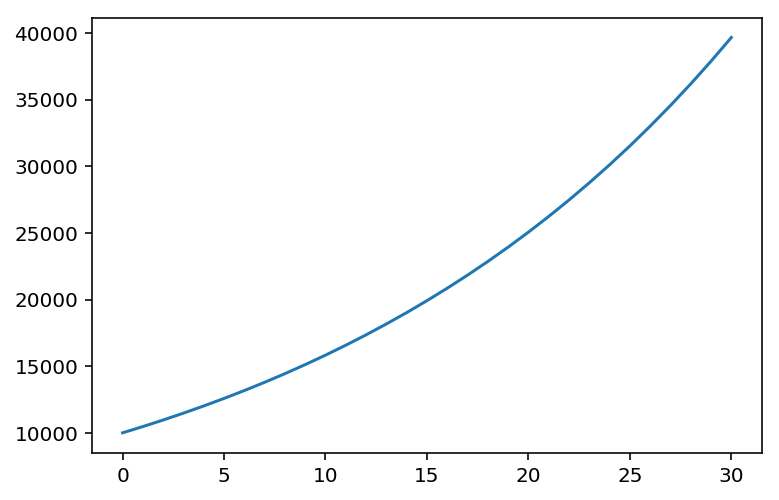

In [5]:
ipywidgets.interact(plot_fv, p=present_value, i=interest_rate, n=compounds_per_year, t=years);

### Making Comparisons 

Well, for just a smidgen more of work, we now have a simple, easy to understand, and easy to use interface for interacting with our `plot_fv` function. But, wouldn't it be nice if we could plot multiple curves on a single plot so we could compare each of the outcomes to find just the right investment? To do so, we just need to hold onto a figure object so we can update it rather than creating a new figure every time the `plot_fv` function is called.

In the next cell, we'll create a global `fig` variable that will hold a `Figure` object that we create with the `pyplot.figure` function. Then we'll redefine our `plot_fv` function to use the new `fig` object in place of the current figure when plotting new lines. This will result in the current plot being updated with new lines every time the `plot_fv` function is called, which will allow us to compare different sets of variables and their outcome. 

Aside from that, the only other difference can be seen on line 17 where we're adding a simple legend to the plot to make it a bit easier to make comparisons between each set of options.

In [6]:
from IPython.display import display

# Create a figure that we can update instead of creating a new figure 
# every time the plot_fv function is called.
fig = plt.figure()

def plot_fv(p, i, n, t):
    """Plots the value of an investment over time
    """
    # We add 1 to the range of years, so we include the initial
    # investment in our list as well.
    fvs = [fv(p, i, n, year) for year in range(t+1)]

    ax = fig.gca()
    ax.plot(fvs, label="p=%d, i=%2f, n=%d, t=%d" % (p, i, n, t))
    # Add a legend and make sure that it's outside of the plot
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    display(fig)

Then, just like we did above, we again create a set of widgets to be passed into the `interact` function. 

On a side note, we could actually just reuse the widgets we created for our last plot, but if we did, adjusting a slider in our new interface would also update that slider in the previous interface since they are both the same object. Now, there are times would you probably want the same widgets in different interfaces to be tied together, but in the current case, this isn't what we want, so instead we'll be creating brand new widgets for each parameter.

This time, we'll also do things a little differently as well. Notice in the code below, that we're only creating three widgets, we've purposely left off the years widget. The reason for the neglect of the years variable is that, now that we are plotting each line on the same plot, adjusting the number of years will lead to changes in the scale of the plot, which isn't fair for comparison, and frankly a little jarring as well. To account for the fact that the number of years is now fixed, we must use the `ipywidgets.fixed` function when calling `interact`, or as you've no doubt noticed, the `interactive` function. So, the big question then, as I already alluded to, is what is the difference between `interact` and `interactive`, and why are we now using the latter? 

Well, the main difference between the two is that the `interactive` function returns a container object that wraps all of the widgets and provides a way for us to get the current values of each. We'll see a use for this container object in the next cell, but for now let's just go ahead and run the code to create our new interface.

In [7]:
present_value = ipywidgets.IntSlider(min=0, max=100000, step=1000, value=10000, 
                                     description='Present Value:', continuous_update=False)
interest_rate = ipywidgets.FloatSlider(min=0.01, max=0.2, step=0.001, value=0.047, 
                                       description='Interest Rate:', continuous_update=False)
compounds_per_year = ipywidgets.IntSlider(min=1, max=12, value=1, 
                                          description='Compounds/Year:', continuous_update=False)
w = ipywidgets.interactive(plot_fv, p=present_value, i=interest_rate, n=compounds_per_year, t=ipywidgets.fixed(30))

The problem that we're going to tackle next is that of reseting the plot. Now that we can add multiple lines to our plot for comparison, we need a way to reset the plot whenever it gets a bit too cluttered. 

In the next cell, we'll create a button widget (with the label "Reset") and add a function to its `on_click` event that will clear the current figure object and the contents of the current cell, and then plot the current set of values in the interface. The first two actions are easy, simply call the `Figure.clf` function to clear the figure, and use the `clear_output` function provided by IPython's `display` module to clear the contents of the current cell. For the last bit though, we'll need to get the current set of values from our interface. Since we used the `ipywidgets.interactive` function in our last cell to create our interface, we have a container object that provides us with a simple interface for getting those values. You can see where we're getting the values using the `kwargs` variable and passing them into our `plot_fv` function on line 12 of our custom `clf` function below.

The last bit to notice is that we add our new `button` object to the container object returned by the call to `ipywidgets.interactive` in the previous cell. Doing so will make the button show up in the interface when you display it.

In [8]:
from IPython.display import clear_output

button = ipywidgets.Button(description="Reset")

# This function will clear the global figure object, clear the output
# of the current cell, and display a new plot with the current set 
# values from the interface.
def clf(*args, **kwargs):
    fig.clf()
    # If we don't call clear_output(), we end up with 2 plots
    clear_output()
    plot_fv(**w.kwargs)
    
button.on_click(clf)
w.children += (button,)

Now that we have our interface created, there's just one thing left to do: display the interface. To do that we simply call IPython's `display` function and pass in the container object we created earlier. 

Incidentally, the `display` function takes a variable number of objects, so if we hadn't added the button to our container object, as we did in the last cell, we could have simply tacked it onto the call to `display` below. The result would've been nearly identical, but one nice feature of adding the button to the container is that it fits into the interface a bit better. Adding the button to the container object will result in its dimensions being adjusted to fit the interface as well as the padding between it and the rest of the interface objects. Whereas, when passed into the `display` function directly, a bit more padding is added between it and the container object's widgets and it will also be expanded to fit the full length cell, which doesn't look as good, in my opinion.

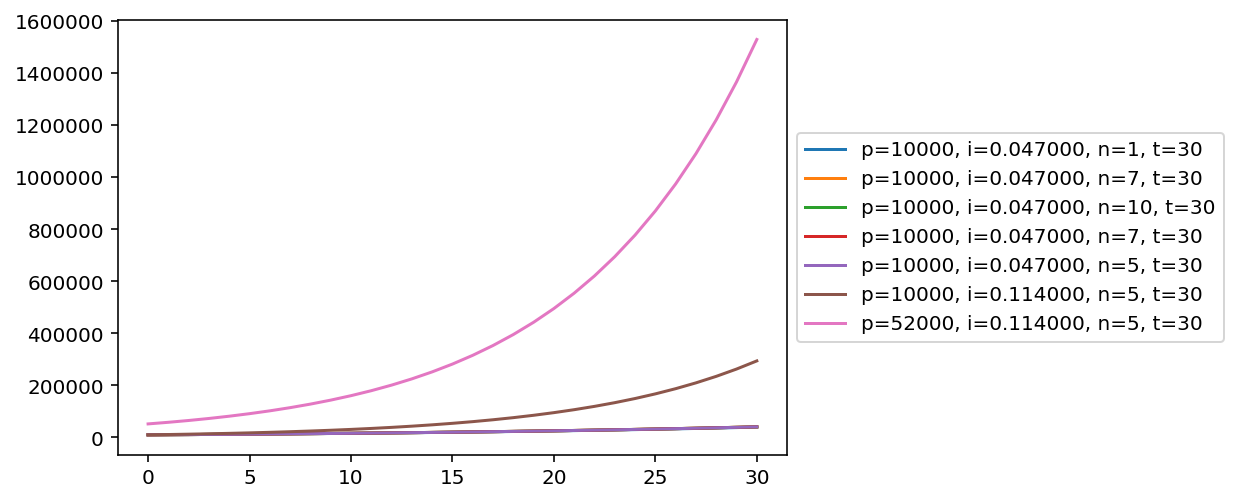

In [9]:
display(w)

## Cleaning Up

So, we now have a fully functional interactive interface to our plotting function. The last thing for us to do is to just tidy up the interface a bit more. The one thing that drives me a bit crazy about the interface is that the sliders and their labels are not lined up. By default, `ipywidgets` right aligns all labels and left aligns all widgets, so we should have a nicely aligned interface, but unfortunately, we've chosen labels that are longer than the hard minimum that `ipywidgets` uses. Luckily, the interface is just a set of HTML elements like anything else in a web page, so we can simply adjust each element's visual attributes using CSS like we would an interface in a normal web page. 

In the next cell, we use the `html` cell magic to add a bit of CSS to our page. The first line of CSS, line 3 below, increases the minimum width of the widget labels allowing everything to line up properly, and the second line adjusts the margins of the reset button to line it up with the sliders as well.

In [10]:
%%html
<style>
.widget-hbox .widget-label { min-width: 20ex }  /* Line up all of the sliders */  
.widget-area .btn { margin: 5px 0 0 22ex }      /* Line the button up with the sliders */
</style>

## Conclusion

And, that's going to bring us to the end of this lesson.

Over the past two lessons, we've seen how easy it is to create simple, effective, and easy to use interfaces for our plotting functions with just a few lines of code using the ipywidgets library. The nice thing about this library, aside from its power and ease of use, is that it comes standard with IPython. So, if you've installed the Anaconda distribution of python, as we did at the beginning of this course, you'll automatically have everything you need to create notebooks that make exploring your data, terribly easy.